In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
df = pd.read_csv('Data/TestData2.tsv', header=0, sep='\t', quotechar='"', error_bad_lines=False)

In [4]:
df = df.dropna()
df.Sex.value_counts()

F    100
M    100
Name: Sex, dtype: int64

In [5]:
df.head()

,SampleID,EGFR,RB1,TP53,CDKN2A,MYC,Sex
0,Sample_1,11.4,17.5,20.4,11.1,16.2,M
1,Sample_2,18.3,19.2,17.1,14.9,17.3,M
2,Sample_3,10.4,16.5,14.0,14.6,20.1,M
3,Sample_4,19.4,17.3,12.5,15.3,15.7,M
4,Sample_5,10.6,10.5,10.3,18.4,10.1,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SampleID  200 non-null    object 
 1   EGFR      200 non-null    float64
 2   RB1       200 non-null    float64
 3   TP53      200 non-null    float64
 4   CDKN2A    200 non-null    float64
 5   MYC       200 non-null    float64
 6   Sex       200 non-null    object 
dtypes: float64(5), object(2)
memory usage: 12.5+ KB


In [7]:
# sns.pairplot(df, hue='Sex')

In [8]:
reducer = umap.UMAP()

In [14]:
df1 = df.drop(['SampleID', 'Sex'], axis = 1)

In [16]:
df1.columns.tolist()

['EGFR', 'RB1', 'TP53', 'CDKN2A', 'MYC']

In [17]:
TCGA_data = df1[df1.columns.tolist()].values

In [18]:
TCGA_data

array([[11.4, 17.5, 20.4, 11.1, 16.2],
       [18.3, 19.2, 17.1, 14.9, 17.3],
       [10.4, 16.5, 14. , 14.6, 20.1],
       [19.4, 17.3, 12.5, 15.3, 15.7],
       [10.6, 10.5, 10.3, 18.4, 10.1],
       [16. , 17.9, 13.3, 10.4, 20.6],
       [16.8, 10.5, 17.9, 20.2, 17.5],
       [19.7, 20.9, 16.6, 15.6, 19.6],
       [13.5, 15.7, 10.3, 14.8, 14.5],
       [16.6, 19.6, 14.9, 14.4, 10.9],
       [12.1, 17.5, 10.1, 13.5, 17.9],
       [12.2, 12.7, 13.2, 11.2, 10.1],
       [16.7, 13.9, 16.2, 12. , 20.8],
       [17.1, 11.6, 10.5, 12.8, 11.3],
       [15.4, 11.1, 16.6, 12.9, 19.2],
       [10.7, 12. , 15.2, 20.2, 17.6],
       [16.3, 11.4, 16.3, 19.4, 17.8],
       [11.8, 13.1, 20.3, 18. , 17.3],
       [19.6, 16.3, 16.2, 13.9, 13.7],
       [20.6, 20.6, 16.9, 20.3, 17.2],
       [11.5, 11.9, 17.8, 18.3, 10.4],
       [17.9, 18.6, 14.4, 20.9, 11.9],
       [18.3, 20.9, 11.4, 12.7, 16.2],
       [15.7, 17.3, 11.2, 14.5, 17.9],
       [19. , 18.3, 14.3, 20.6, 18.3],
       [13.5, 15.7, 16.4,

In [19]:
# Converts each feature into z-scores (number of SD from the mean) for comparability.
scaled_TCGA_data = StandardScaler().fit_transform(TCGA_data)

In [20]:
embedding = reducer.fit_transform(scaled_TCGA_data)
embedding.shape

(200, 2)

Text(0.5, 1.0, 'UMAP projection of the TCGA')

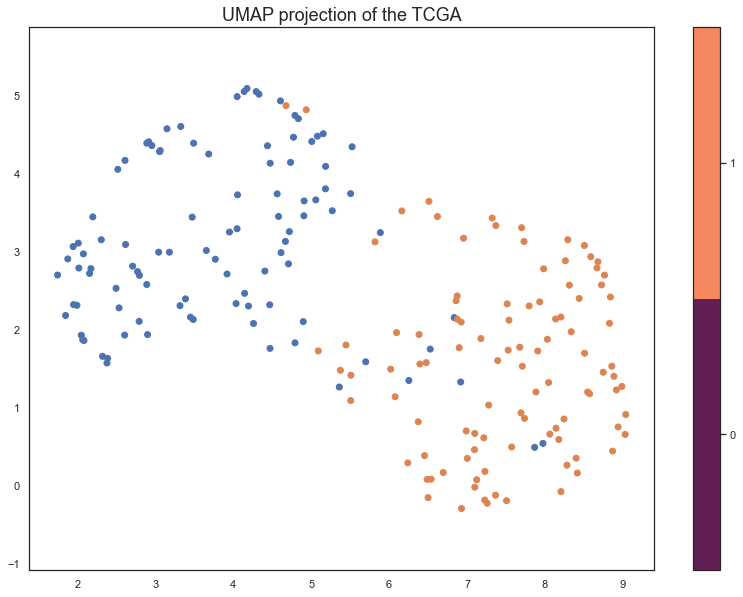

In [21]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.Sex.map({"M":0, "F":1})])
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2.5))
plt.title('UMAP projection of the TCGA', fontsize=18)